# Homework 08


### ⚠️ Before you start ⚠️

_Duplicate this Jupyter Notebook in your `week-10` folder (right-click -> Duplicate) and then add your last name to the beginning of it (ie. `blevins-hw-08.ipynb` - otherwise you risk having all your work overwritten when you try to sync your GitHub repository with your instructor's repository._


---


## Overview

In this assignment, you'll synthesize some of the Python skills you've learned over the past month or so, including Pandas and Plotly. You'll be analyzing the opening of new businesses in Colorado during the 1940s.

Draw on the following tutorials:

- 💻 Walsh, [Pandas Basics Part 1](https://melaniewalsh.github.io/Intro-Cultural-Analytics/03-Data-Analysis/01-Pandas-Basics-Part1.html)
- 💻 Walsh, [Pandas Basics Part 2](https://melaniewalsh.github.io/Intro-Cultural-Analytics/03-Data-Analysis/02-Pandas-Basics-Part2.html)
- 💻 Walsh, [Pandas Basics Part 3](https://melaniewalsh.github.io/Intro-Cultural-Analytics/03-Data-Analysis/03-Pandas-Basics-Part3.html)
- 🐼 [Pandas Concepts](https://cblevins.github.io/sp25-data/modules/pandas-concepts/)
- 💻 [Introduction to Plotly](https://cblevins.github.io/sp25-data/modules/plotly-intro/)
- 💻 [Cleaning Excel Files](https://cblevins.github.io/sp25-data/modules/excel-cleaning/)


## The Data

First, get the necessary data files from our shared course repository:

- Open GitHub Desktop and select your course repository (`lastname-sp25-data-materials`)
- Click `Fetch origin` to check for updates
- Go to `Branch` → `Merge into current branch` → select `upstream/main` -> `Merge`
- Click `Push origin` to sync everything up
- Launch Jupyter Lab and navigate to the `week-10` folder

You should see a single Excel file that you will be working with: `co-new-businesses-1940s.xlsx`. Inside that Excel file, there are two separate sheets: `New CO Businesses` and `Cities 1940`.

- `New CO Businesses`: This is a subset of new businesses that were established in Colorado during the 1940s - a subset of data drawn from [this database](https://data.colorado.gov/Business/Business-Entities-in-Colorado/4ykn-tg5h/about_data).
- `Cities 1940`: this contains population statistics for Colorado cities in the 1940 Census.


### Import Libraries and Load Data

- Import the necessary libraries:

  - pandas (using the alias `pd`)
  - plotly.express (using the alias `px`)


In [7]:
import pandas as pd

In [8]:
import plotly.express as px

- Load both sheets from the Excel file:
  - Create a variable called `businesses_df` to store the "New CO Businesses" sheet in the Excel file
  - Create a variable called `cities_df` to store the "Cities 1940" sheet in the Excel file
  - Use `pd.read_excel()` with the appropriate parameters


In [10]:
businesses_df = pd.read_excel('co-new-businesses-1940s.xlsx', sheet_name='New CO Businesses')
cities_df = pd.read_excel('co-new-businesses-1940s.xlsx', sheet_name='Cities 1940')

### Familiarize Yourself with the Data

Familiarize yourself with the data:

- Display a sample of 10 rows from each dataframe.
- Check the data types for the columns in each dataframe


In [12]:
businesses_df.sample(10)

,entityid,Business entity name,Address,city,state,zip_code,Country,date_entity_formed,year_entity_formed
642,19871114168,COLORADO ZETA ALUMNI ASSOCIATION OF SIGMA ALPH...,3120 E Kentucky Ave,Denver,CO,NaN,US,1948-03-01,1948
880,19871107525,"RUSTIC TAVERN, INC., Delinquent June 1, 2016",5126 W 29TH AVE,DENVER,CO,80212.0,US,1943-01-02,1943
478,19871109700,FRANKLIN PIPE LINE COMPANY,NaN,NaN,NaN,NaN,NaN,1945-09-11,1945
210,19871177812,Lakewood Bible Chapel,5260 W Florida Ave,Lakewood,CO,NaN,US,1948-09-29,1948
279,19871115875,PUEBLO KENNEL ASSOCIATION,3215 LAKE AVE,PUEBLO,CO,81004.0,US,1949-02-07,1949
870,19871117104,"STEAMBOAT SPRINGS WINTER SPORTS CLUB, INC.",845 Howelsen Parkway,STEAMBOAT SPRINGS,CO,80487.0,US,1949-10-17,1949
87,19871193545,"KUBAT EQUIPMENT & SERVICE CO., LLC",1070 S Galapago Street,Denver,CO,80223.0,US,1949-08-31,1949
596,19871113005,"THE FOREST QUEEN MINES, INC.",157 W SILVER STAGE DR,CRESTED BUTTE,CO,81224.0,US,1947-07-15,1947
160,19871015778,VERNON CASUALTY INSURANCE COMPANY,NaN,NaN,NaN,NaN,NaN,1949-11-28,1949
125,19871006695,HARDWARE MUTUAL INSURANCE COMPANY OF MINNESOTA,NaN,NaN,NaN,NaN,NaN,1944-07-24,1944


In [13]:
businesses_df.dtypes

entityid                  int64
Business entity name     object
Address                  object
city                     object
state                    object
zip_code                float64
Country                  object
date_entity_formed       object
year_entity_formed        int64
dtype: object

In [14]:
cities_df.sample(10)

,city,year,total population
65,firestone,1940,262
193,simla,1940,421
207,vona,1940,226
177,rifle,1940,1373
92,haswell,1940,163
107,johnstown,1940,961
218,woodland park,1940,372
136,meeker,1940,1399
51,dove creek,1940,418
130,manassa,1940,1008


In [15]:
cities_df.dtypes

city                object
year                 int64
total population     int64
dtype: object

## Data Cleaning and Preparation

### Cleaning column names

For both datasets, you want to clean and standardize the column names (headers):

- Change column names to all lowercase
- Replace any whitespace with an underscore (`_`) - ex. `some column` becomes `some_column`
- _Hint: Use `str.lower()` and `str.replace()`_
- Show the first 10 rows of your dataframe to make sure it worked


In [17]:
businesses_df.columns = [col.strip().lower().replace('   ', '_').replace(' ', '_') for col in businesses_df.columns]
cities_df.columns = [col.strip().lower().replace('_', '').replace(' ', '_') for col in cities_df.columns]

In [18]:
businesses_df.head(10)

,entityid,business_entity_name,address,city,state,zip_code,country,date_entity_formed,year_entity_formed
0,19871004753,ALAMOSA CREDIT UNION,2437 MAIN ST,ALAMOSA,CO,81101.0,US,1945-03-27,1945
1,19871241137,THE UNITED METHODIST CHURCH OF STEAMBOAT SPRINGS,736 OAK ST,STEAMBOAT SPRINGS,CO,80487.0,US,1949-03-09,1949
2,19871275274,ALLIED JEWISH FEDERATION OF COLORADO,300 S. Dahlia St.,DENVER,CO,80246.0,US,1946-05-23,1946
3,19871127721,"Iglesia CRISTO REY + Christ the King, ELCA",2300 S Patton Ct,Denver,CO,80219.0,US,1945-09-06,1945
4,19871117433,"LYNCH-COTTEN POST NO. 190, THE AMERICAN LEGION",425 Highway 92,Crawford,CO,81415.0,US,1949-12-30,1949
5,19871105155,THE BEAR RIVER VALLEY FARMERS COOPERATIVE,193 E Jefferson Ave,Hayden,CO,81639.0,US,1940-03-22,1940
6,19871162072,Belmar Baptist Church,460 S Kipling St,Lakewood,CO,80226.0,US,1943-08-20,1943
7,19871110810,"Bethel Lutheran Church of Windsor, Colorado",328 Walnut St,Windsor,CO,80550.0,US,1946-05-24,1946
8,19871116977,"BLACKINTON AND DECKER, INC., Delinquent Novemb...",424 LIPAN,DENVER,CO,80204.0,US,1946-05-20,1946
9,19871113871,"BOW-MAR OWNERS, INC.",5380 Lakeshore Dr,Littleton,CO,80123.0,US,1948-01-12,1948


In [19]:
cities_df.head(10)

,city,year,total_population
0,akron,1940,1417
1,alamosa,1940,5613
2,alma,1940,469
3,antonito,1940,1220
4,arriba,1940,286
5,arvada,1940,1482
6,aspen,1940,777
7,aurora,1940,3437
8,basalt,1940,212
9,bayfield,1940,372


### Standardize and clean data for cities

- Standardize city names in the business data so that it **removes any trailing or leading whitespace** and **changes the values to all lowercase** (hint: use `.str.strip()` and `.str.lower()`)
- Show the first 10 rows of your dataframe to make sure it worked


In [21]:
businesses_df['city'] = businesses_df['city'].str.strip().str.title()
cities_df['city'] = cities_df['city'].str.strip().str.title()

In [22]:
businesses_df.head(10)

,entityid,business_entity_name,address,city,state,zip_code,country,date_entity_formed,year_entity_formed
0,19871004753,ALAMOSA CREDIT UNION,2437 MAIN ST,Alamosa,CO,81101.0,US,1945-03-27,1945
1,19871241137,THE UNITED METHODIST CHURCH OF STEAMBOAT SPRINGS,736 OAK ST,Steamboat Springs,CO,80487.0,US,1949-03-09,1949
2,19871275274,ALLIED JEWISH FEDERATION OF COLORADO,300 S. Dahlia St.,Denver,CO,80246.0,US,1946-05-23,1946
3,19871127721,"Iglesia CRISTO REY + Christ the King, ELCA",2300 S Patton Ct,Denver,CO,80219.0,US,1945-09-06,1945
4,19871117433,"LYNCH-COTTEN POST NO. 190, THE AMERICAN LEGION",425 Highway 92,Crawford,CO,81415.0,US,1949-12-30,1949
5,19871105155,THE BEAR RIVER VALLEY FARMERS COOPERATIVE,193 E Jefferson Ave,Hayden,CO,81639.0,US,1940-03-22,1940
6,19871162072,Belmar Baptist Church,460 S Kipling St,Lakewood,CO,80226.0,US,1943-08-20,1943
7,19871110810,"Bethel Lutheran Church of Windsor, Colorado",328 Walnut St,Windsor,CO,80550.0,US,1946-05-24,1946
8,19871116977,"BLACKINTON AND DECKER, INC., Delinquent Novemb...",424 LIPAN,Denver,CO,80204.0,US,1946-05-20,1946
9,19871113871,"BOW-MAR OWNERS, INC.",5380 Lakeshore Dr,Littleton,CO,80123.0,US,1948-01-12,1948


In [23]:
cities_df.head(10)

,city,year,total_population
0,Akron,1940,1417
1,Alamosa,1940,5613
2,Alma,1940,469
3,Antonito,1940,1220
4,Arriba,1940,286
5,Arvada,1940,1482
6,Aspen,1940,777
7,Aurora,1940,3437
8,Basalt,1940,212
9,Bayfield,1940,372


## Categorize Cities

### Define your function

Create a function called `categorize_city_size` that does the following:

- Takes in a number that corresponds to the population for a city and returns the following based on the size of the city:
  - `Small Town` if population is less than 1,000
  - `Medium Town` if population is between 1,000 to 5,000
  - `Large Town` if population is between 5,000 to 20,000
  - `City` if population greater than or equal to 20,000


In [60]:
def categorize_city_size(population):
    if population <= 1000:
        return "Small Town"
    elif population <= 5000:
        return "Medium Town"
    elif population <= 20000:
        return "Large Town"
    else:
        return"City"
         

In [62]:
categorize_city_size(500)

'Small Town'

### Test Your Function

Test out the function on a single number (`2,000`) to make sure it returns `Medium Town`


In [65]:
categorize_city_size(2000)

'Medium Town'

### Apply the function

- Take your `cities_df` dataframe and add a new column called `city_category` that applies your function to the `total_population` column of the dataframe.
- _Hint: use `apply()`_
- Show the first 10 rows of your dataframe to make sure it worked


In [67]:
cities_df['city_category']=cities_df['total_population'].apply(categorize_city_size)

In [69]:
cities_df.head(10)

,city,year,total_population,city_category
0,Akron,1940,1417,Medium Town
1,Alamosa,1940,5613,Large Town
2,Alma,1940,469,Small Town
3,Antonito,1940,1220,Medium Town
4,Arriba,1940,286,Small Town
5,Arvada,1940,1482,Medium Town
6,Aspen,1940,777,Small Town
7,Aurora,1940,3437,Medium Town
8,Basalt,1940,212,Small Town
9,Bayfield,1940,372,Small Town


## Analyze Businesses by Year

Let's take a look at how many new businesses were formed in Colorado in each year during the 1940s:

### Calculate new businesses by year

Create a variable called `businesses_per_year` by:

- Counting the number of new businesses based on `year_entity_formed`
- _Hint: use `value_counts()` and `reset_index()`_
- Show the first 10 rows of your dataframe


In [85]:
biz_year = businesses_df['year_entity_formed'].value_counts().reset_index()

### Visualize new businesses by year

Create a bar chart using Plotly Express showing new businesses per year:

- Set x-axis to the year
- Set y-axis to the number of new businesses
- Add an appropriate title and labels
- Display text on each bar
- Hint: Use `px.bar()`


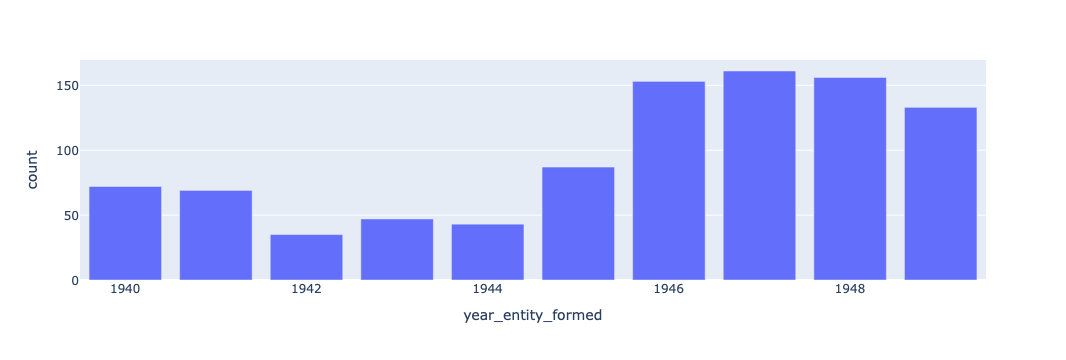

In [92]:
# Create a simple bar chart
fig = px.bar(biz_year, x='year_entity_formed', y='count')
title='New Businesses by Year',  
labels={'Year': 'year_entity_formed', 'Number of Businesses': 'count'} 

# Show the figure
fig.show()


## Analyze Businesses by City

Let's take a look at how many new businesses were formed in each Colorado city during the 1940s:

## Calculate number of new businesses by city

Create a new variable called `city_businesses` that contains:

- A dataframe with counts of the number of new businesses in each city
- _Hint: Use `value_counts()` and `reset_index()`_
- Show the first 10 rows of your dataframe


In [105]:
city_businesses = businesses_df['city'].value_counts().reset_index()
city_businesses.head(10)

,city,count
0,Denver,152
1,Colorado Springs,34
2,Lakewood,22
3,Pueblo,20
4,Arvada,14
5,Grand Junction,14
6,Fort Collins,13
7,Greeley,13
8,Centennial,12
9,Englewood,12


## Visualize new businesses by city

Create a bar chart with Plotly Express showing the top 10 cities with the most new businesses created during the 1940s:

- Filter to only show the top 10 cities (hint: use `.head()`)
- Set x-axis to `city`
- Set y-axis to `count`
- Add an appropriate title and labels


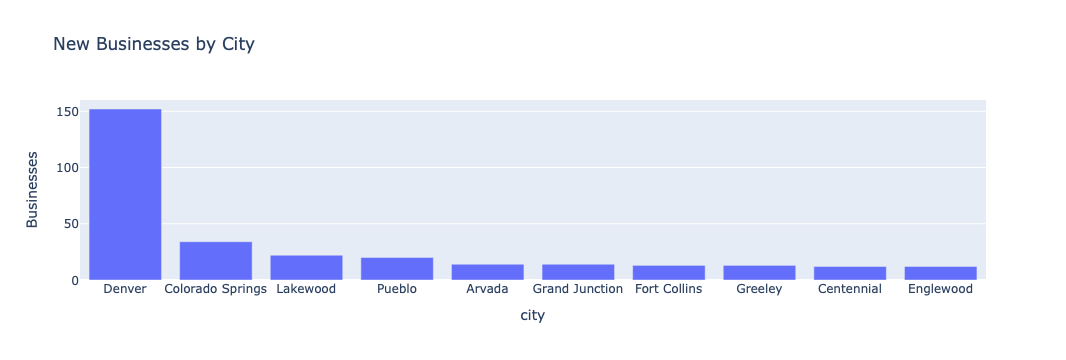

In [115]:
# Add title and customize axis labels
fig2 = px.bar(
    city_businesses.head(10),
    x='city',
    y='count',
    title='New Businesses by City',  # Add a title
    labels={'county': 'City', 'count': 'Businesses'}  # Rename axis labels
)

# Display the chart
fig2.show()


## Combine Business and City Data

We have two datasets, both of which contain information about Colorado cities. Let's combine the two into a single dataframe that contains both information about new businesses and their population in the 1940 census.

### Merge dataframes

Merge the two dataframes together:

- Create a new variable called `merged_df`
- Use `pd.merge()` on the `city_businesses` and `cities_df` dataframes
- Figure out which column is shared between the two to use as your "key" to merge them
- ⚠️ **Note: use the `how='inner'` parameter for your merge**
- Show the first 10 rows of your new dataframe


In [123]:
merged_df = pd.merge(city_businesses, cities_df, on='city', how='inner')
merged_df.head(10)


,city,count,year,total_population,city_category
0,Denver,152,1940,322412,City
1,Colorado Springs,34,1940,36789,City
2,Pueblo,20,1940,52162,City
3,Arvada,14,1940,1482,Medium Town
4,Grand Junction,14,1940,12479,Large Town
5,Fort Collins,13,1940,12251,Large Town
6,Greeley,13,1940,15995,Large Town
7,Englewood,12,1940,9680,Large Town
8,Littleton,11,1940,2244,Medium Town
9,Aurora,10,1940,3437,Medium Town


### Filter out missing values

You'll note that several rows of data contain `NaN` or missing values - this means that there was a city listed in the businesses dataframe but it didn't have a corresponding match in the population dataframe. For now, remove these from the `merged_df` dataframe:

- Filter out rows where `total_population` is NaN
- _Hint: use a filter + `.notna()`_


In [128]:
merged_df[merged_df['total_population'].notna()]

,city,count,year,total_population,city_category
0,Denver,152,1940,322412,City
1,Colorado Springs,34,1940,36789,City
2,Pueblo,20,1940,52162,City
3,Arvada,14,1940,1482,Medium Town
4,Grand Junction,14,1940,12479,Large Town
...,...,...,...,...,...
108,Meeker,1,1940,1399,Medium Town
109,Evans,1,1940,792,Small Town
110,Walsenburg,1,1940,5855,Large Town
111,Sugar City,1,1940,565,Small Town


### Calculate new businesses on a per capita rate

To make it easier to compare larger cities with smaller cities, you're going to calculate a new column for each city: the number of new businesses per 1,000 residents.

- Add a new column to `merged_df` called `biz_per_thousand` that is filled with:
  - A calculation dividing the `count` column by the `total_population` column and multiplying by 1,000
- Sort the merged dataframe by `biz_per_thousand` in descending order
- Show the first 10 rows of the dataframe to check if it worked


In [140]:
merged_df['biz_per_thousand'] = merged_df['count'] / merged_df['total_population'] * 1000
merged_df.sort_values(by='total_population', ascending=True)
merged_df.head(10)

,city,count,year,total_population,city_category,biz_per_thousand
0,Denver,152,1940,322412,City,0.471446
1,Colorado Springs,34,1940,36789,City,0.924189
2,Pueblo,20,1940,52162,City,0.383421
3,Arvada,14,1940,1482,Medium Town,9.446694
4,Grand Junction,14,1940,12479,Large Town,1.121885
5,Fort Collins,13,1940,12251,Large Town,1.061138
6,Greeley,13,1940,15995,Large Town,0.812754
7,Englewood,12,1940,9680,Large Town,1.239669
8,Littleton,11,1940,2244,Medium Town,4.901961
9,Aurora,10,1940,3437,Medium Town,2.909514


## Visualize new business creation by city

Let's say we want to see the cities with the highest _rate_ of business creation (ie. new businesses per thousand residents)

- Create a bar chart in Plotly of `merged_df`:
  - Filter to only show the top 10 cities (use `.head(10)`)
  - Set x-axis to `city`
  - Set y-axis to `biz_per_thousand`
  - Use `city_category` for color
  - Add an appropriate title and labels


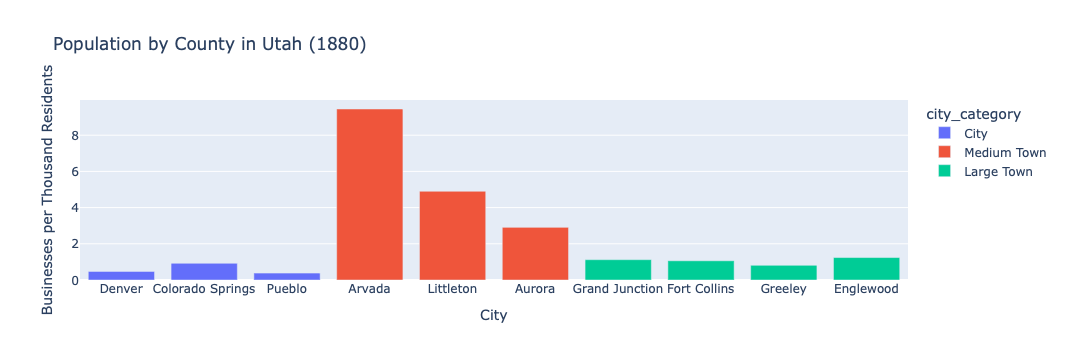

In [147]:
# Add title and customize axis labels
fig3 = px.bar(
    merged_df.head(10),
    x='city',
    y='biz_per_thousand',
    title='Population by County in Utah (1880)',  # Add a title
    labels={'city': 'City', 'biz_per_thousand': 'Businesses per Thousand Residents'},  # Rename axis labels
    color='city_category',    
)

# Display the chart
fig3.show()


## Bonus: New businesses by city category

Let's say we want to compare different size categories to see whether new businesses were cropping up in smaller places or bigger cities.

### Create a new dataframe

First, you'll need to create a new dataframe that consists of four rows, with each row a different category of city containing the total number of businesses created within that category of city.

- Create a new dataframe called `city_category_totals`
- Start with `merged_df`
- Group by `city_category`
- Add up (`sum()`) the `count` column
- Use `.reset_index()`


In [ ]:
#Your code here

### Visualize businesses by city category

- Create a [pie chart](https://plotly.com/python/pie-charts/) in Plotly:

  - Use `px.pie()` with appropriate parameters
  - Use `city_category_totals` as your dataframe
  - Use `count` for your values
  - Use `city_category` for your names
  - Add an appropriate title and labels


In [ ]:
#Your code here

## Bonus Challenge: Create a Scatterplot

Create a scatter plot in Plotly showing:

- The relationship between city population (x-axis) and new businesses (y-axis)
- Only data for towns with a population of 2,000 or more people.
- Dots sized according to the number of new businesses in that city
- Dots colored according to their size category


In [ ]:
#Your code here

## Submission Guidelines

- Run all code cells and make sure it is outputting without errors
- Submit both the notebook file (.ipynb) and a PDF export of your notebook [on Canvas](https://ucdenver.instructure.com/courses/552717/assignments/1932039)
- Note: the PDF probably won't display the Plotly figures - that's okay
